In [51]:
from cfg import *

In [52]:
import rpy2

In [76]:
import PrimaryLibrary as PL
imp.reload(PL)

#import Allen_API_Library as PrL
#imp.reload(PrL)

clear_output()

### Update the MesoPred params with information regarding subcortical and thalamic indices

In [62]:
GeneExp        = h5py.File('G_Exp.hdf5', 'r')['dataset1']
ConDict        = pk.load(open('CreLineDict.pkl','rb'))

In [77]:
MesoPred = PL.MesoconnectomePredictor()
a,b,c,d  = MesoPred.PreProcessing(GeneExp[MesoPred.params['leaf_keys'],:], 
                                  MesoPred.params,
                                  ConDict['wild_type']['ConMat'][MesoPred.params['leaf_keys'],:])
clear_output()

In [21]:
ClfResults_ridge = {}; ridge_pred = {}
MesoPred.params           = pk.load(open('updated_params.pkl','rb'))
for key in ConDict.keys():
    if os.path.isfile('saves/' + key + '_all_results' + '_ridge.pkl') == True:
        infile = 'saves/' + key + '_all_results' + '_ridge.pkl'
        print infile
        tmp = pk.load(open(infile,'r'))
        ClfResults_ridge[key] = {key:val for key,val in tmp.items()}
         
clear_output()      

In [7]:
 GeneMeta       = pk.load(open('GeneMeta.pkl','r'))

Nr5a1-Cre 0.91766210974 0.0517240864481


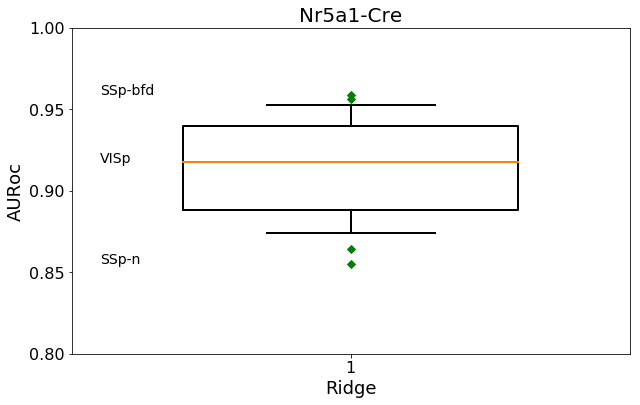

Scnn1a-Tg3-Cre 0.902071005917 0.0439812243577


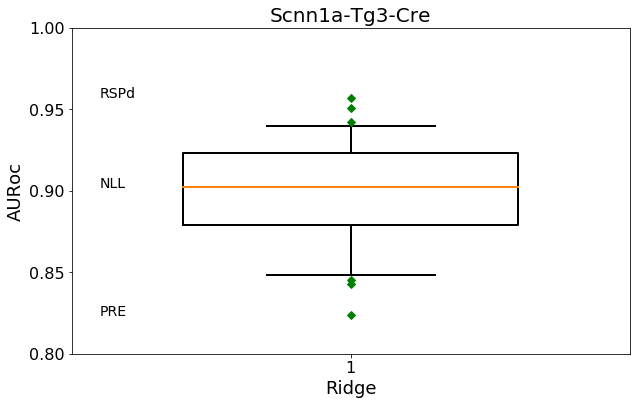

Ntsr1-Cre_GN220 0.868289137711 0.0360290543184


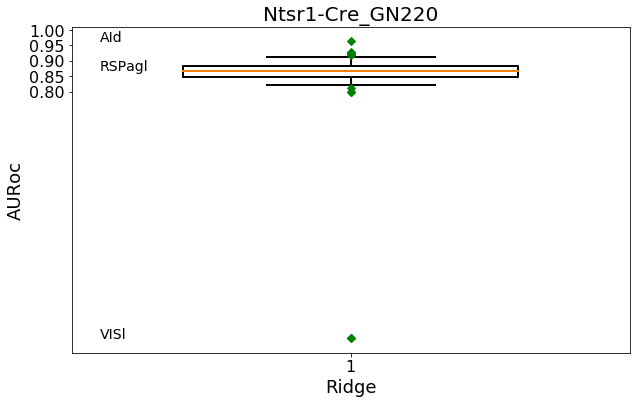

Emx1-IRES-Cre 0.934958520332 0.0344214145768


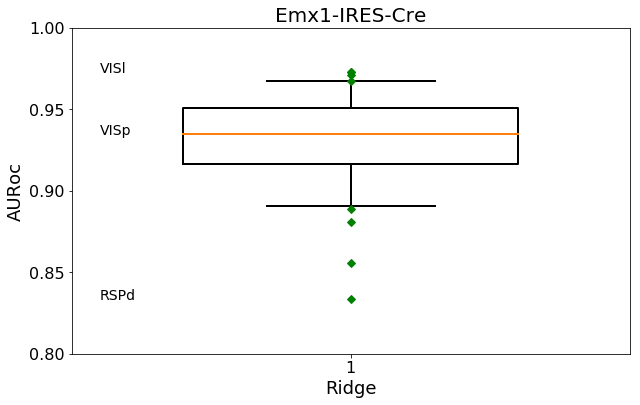

Efr3a-Cre_NO108 0.903911900066 0.0408967978584


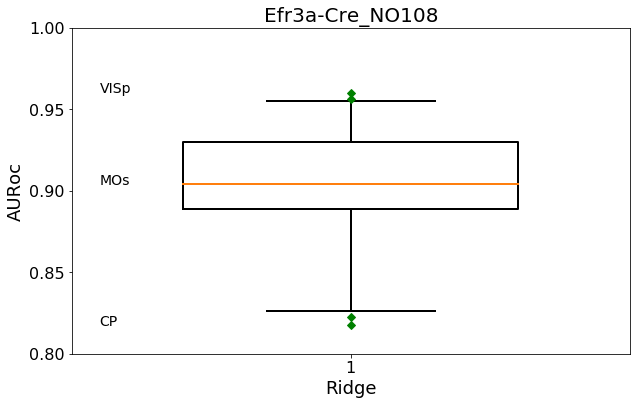

Rbp4-Cre_KL100 0.918715759969 0.0403883940322


KeyboardInterrupt: 

In [9]:
measure  = 'AURoc'
MetaInfo = {}
for key in ClfResults_ridge.keys():
    tmp1 = [val[0] for val in ClfResults_ridge[key][measure]] 
    sort1 = np.argsort(tmp1)[::-1]; sort3 = np.sort(tmp1)[::-1]
    set_length = len(sort1)   

    MetaInfo['min1']  = [MesoPred.ConDict[key]['structure-abbrev'][sort1[set_length-1]], sort3[set_length-1]]
    MetaInfo['max1']  = [MesoPred.ConDict[key]['structure-abbrev'][sort1[0]], sort3[0]]
    MetaInfo['med1']  = [MesoPred.ConDict[key]['structure-abbrev'][sort1[set_length/2]], sort3[set_length/2]]

    MetaInfo['save_file']  = key + '_' + measure +'.jpg'
    MetaInfo['save_file2'] = key + '_' + measure +'.eps'
    MetaInfo['title']      = key  
    MetaInfo['ylabel']     = measure
    MetaInfo['xlabel']     = 'Ridge'
    MetaInfo['lb']         = np.min(ClfResults_ridge[key][measure]) - 0.1
    MetaInfo['ub']         = 1.0
   
    print key, np.median(ClfResults_ridge[key][measure]), sci.stats.iqr(ClfResults_ridge[key][measure])
    fsz = 14
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(10,6))
    plt.tight_layout()
    plt.rcParams['figure.figsize']
    box = plt.boxplot(ClfResults_ridge[key][measure], 0, 'gD', widths = 0.6, whis = [5,95])
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize = 16)
    ax.yaxis.set_tick_params(labelsize = 16)
    plt.text(0.55, MetaInfo['max1'][1], MetaInfo['max1'][0], fontsize = fsz)
    plt.text(0.55, MetaInfo['min1'][1], MetaInfo['min1'][0], fontsize = fsz)
    plt.text(0.55, MetaInfo['med1'][1], MetaInfo['med1'][0], fontsize = fsz)
    plt.title(MetaInfo['title'], fontsize = 20)
    plt.xlabel(MetaInfo['xlabel'], fontsize = 18)
    plt.ylabel(MetaInfo['ylabel'], fontsize = 18)
    
    for key2 in box.keys():
        for bp in box[key2]:
            bp.set(linewidth = 2)
            
    if key == 'wild_type':
        lb = 0.7
    else:
        lb = 0.8
    plt.yticks(np.arange(lb,1.01,0.05))
    #plt.yticks(np.arange(0.4,1.0,0.05))

    plt.savefig('paper1_figures/regression_accuracy_figures/' + MetaInfo['save_file'])
    plt.savefig('paper1_figures/regression_accuracy_figures/' + MetaInfo['save_file2'])
    plt.show(block = False)
    plt.pause(1)
    plt.close()
     

### Step #1: stratify cre lines based on their predictive performance proximity with wild-type

### Step #2: evaluate cre and wild_type proximity based on their laminar profiles

Looking at the differences between the projection patterns of cre lines close to wild type and those further away in terms of different in predictive accuracy, there is no significant difference between them. Hence, all driver lines share similar projection tendencies on an average level across brain areas that can be also validated by our predicted model. Therefore, if there is any reason for differences in predictive performance I am suspecting numerical scaling difficulties during the unionization process

Performance of Laminar Enrichment Analysis with top important genes

### Observation #2:  
Here I was trying to re-run gene ontology enrichment analysis and the problem that I have stumbled upon is outdated R. Updating R through conda implies the update of packages that are related to the CCP pipeline and hence it could put the pipeline at risk given the March deadline. Therefore, I will utilize the GO enrichment tables from cerebellum ...

As the results show, there is a big number of significant correlations on the actual tracing data between wild type and cre. Therefore, I suspect that numerical scaling differences play an important role in the prediction performance of our models.  Let's display two indicative cre and wild type experiments respectively:

In [ ]:
gene_dict2 = pk.load(open('saves/RandomizedLasso_results_1_4_19.pkl','rb'))

In [ ]:
GODict2 = pk.load(open('GODict2.pkl','rb'))
for key in GODict2.keys():
    tmp = [component for component in GODict2[key] if 'neur' in component or 'synap' in component]
    GODict2[key] = tmp
GO_DF = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in GODict2.items() ])) 
#plt.plot(frame_on = False) # no visible frame
tbl = render_mpl_table(GO_DF)
ax = plt.gca()
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis
plt.savefig('paper1_figures/GO_results.jpg')
plt.show()

In [18]:
Components = pk.load(open('saves/Components.pkl','rb'))
Code = pk.load(open('saves/Code.pkl','rb'))
dlsc_mdl = pk.load(open('saves/dict_mdl.pkl','rb'))
G_Components = pk.load(open('saves/Grange_Atoms.pkl','rb'))
G_Code = pk.load(open('saves/Grange_Code.pkl','rb'))
G_dlsc_mdl = pk.load(open('saves/Grange_mdl.pkl','rb'))

In [ ]:
top_num = 50
top_gene_idx2 = np.argsort(G_Components[285,:])[::-1][0:top_num]
top_gene_ids2 = [MesoPred.params['Gene Ids'][val] for val in top_gene_idx2 if MesoPred.params['Gene Ids'][val] is not None]
print top_gene_ids2

In [ ]:
top_num = 50
top_gene_idx = np.argsort(Components[14,:])[::-1][0:top_num]
top_gene_ids = [MesoPred.params['Gene Ids'][val] for val in top_gene_idx if MesoPred.params['Gene Ids'][val] is not None]
print top_gene_ids

In [ ]:
top_num = 50
top_gene_idx3 = np.argsort(ClfResults_ridge['wild_type']['final model'].coef_[:,385])[::-1][0:top_num]
top_gene_ids3 = [MesoPred.params['Gene Ids'][val] for val in top_gene_idx3 if MesoPred.params['Gene Ids'][val] is not None]
print top_gene_ids3

In [ ]:
GODict = {'Unconstrained Module 14': {}, 'Constrained Module 285': {}, 'Wild-type DG': {}}
key_list = list(GODict.keys()) 
print key_list

In [ ]:
GODict

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects import numpy2ri
ro.numpy2ri.activate()
GODict = {}
 
top_num = 50
PAA_gene_ids = np.argsort(ClfResults_ridge['wild_type']['final model'].coef_[sel_tracer,:])[::-1][0:top_num]
PAA_players = [MesoPred.params['Gene Ids'][val] for val in PAA_gene_ids if MesoPred.params['Gene Ids'][val] is not None]
for mod in [46,117,118]:
    mod_gene_ids = np.argsort(Atoms[mod,:])[::-1][0:top_num]
    gene_lista  = [MesoPred.params['Gene Ids'][val] for val in mod_gene_ids if MesoPred.params['Gene Ids'][val] is not None]
    GODict['module {}'.format(mod)] = MesoPred.GOenrichment(gene_lista)
GODict['wild-type PAA'] = MesoPred.GOenrichment(PAA_players)
    

In [ ]:
GO_DF = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in GODict.items()]))
tbl = render_mpl_table(GO_DF)
plt.savefig('paper1_figures/module_ontology_results.jpg')
plt.savefig('paper1_figures/module_ontology_results.eps')

### Important Experiment: !!!!
I will remake the regionalized array by mixing projection patterns from different profiles

In [ ]:
model_meta = pk.load(open('model_meta.pkl','rb'))
layer_resolved_array = pk.load(open('layer_resolved_array.pkl','rb'))
print model_meta.keys()

In [ ]:
LayerArray,ModelMeta = MesoPred.GetLayerResolvedArray(mode = 'unionized', 
                                                cre_file = 'Supplementary Table 1.csv')

In [ ]:
LayerArray2 = []
for modelaki in ModelMeta['model']:
    LayerArray2.append(modelaki.connection_density.T)
     
LayerArray2 = np.dstack(LayerArray2)

In [ ]:
new_layer_mat = np.zeros((np.shape(LayerArray2)[0],np.shape(LayerArray2)[1]))
with open('structures.csv','rb') as fp:
                structure       = PL.readtable(fp) 
                struct_idx_dict = {val:idx for idx,val in enumerate(structure['id'])}
    
layers = PL.LaminarRegistration(ModelMeta['source id'])
for idx,source in enumerate(layers):
    prof_hit = [prof_id for prof_id,val in enumerate(ModelMeta['layer profiles'])                 
                if val.split(' ')[0].replace('L','layer').split('layer')[1] 
                in source.split('layer ')[1] and val != 'layer inspecific']
         
    if len(prof_hit) == 0:
        new_layer_mat[:,idx] = LayerArray2[:,idx,5]
    else:
        new_layer_mat[:,idx] = LayerArray2[:,idx,prof_hit[0]]

In [ ]:
target  = np.asarray(ModelMeta['target id'])
source  = np.asarray(ModelMeta['source id'])
resorting_trg_indices = np.argsort(ModelMeta['target id'])
model_meta['sorting target id'] = target[resorting_trg_indices]
resorting_src_indices = np.argsort(ModelMeta['source id'])
model_meta['sorting source id'] = source[resorting_src_indices]
layer_array_2 = new_layer_mat[resorting_trg_indices,:]
layer_array_3 = layer_array_2[:,resorting_src_indices]

In [ ]:
LayerDf = pd.DataFrame(data = layer_array_3,
                           index = model_meta['sorting target id'], 
                           columns = model_meta['sorting source id'])
#pk.dump(LayerDf, open('paper1_figures/Layer_specific_Df.pkl','wb'))

#LayerDf = pk.load(open('paper1_figures/Layer_specific_Df.pkl','rb'))
plt.figure(figsize = (30,15))
plt.title('laminar specific regionalized array', fontsize = 32)
sns.set(font_scale=2.1)
sns.heatmap(LayerDf)
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 22)
ax.yaxis.set_tick_params(labelsize = 22)
plt.xticks(rotation = 290)
plt.yticks(rotation = 30)
#plt.savefig('paper1_figures/Merged_RegionalizedArray.jpg')
#plt.savefig('paper1_figures/Merged_RegionalizedArray.eps')

In [ ]:
LayerDf = pd.DataFrame(data = layer_array_3[0:25,0:25],
                           index = model_meta['sorting target id'][0:25], 
                           columns = model_meta['sorting source id'][0:25])
#pk.dump(LayerDf, open('paper1_figures/Layer_specific_Df.pkl','wb'))

#LayerDf = pk.load(open('paper1_figures/Layer_specific_Df.pkl','rb'))
plt.figure(figsize = (30,15))
plt.title('laminar specific regionalized array', fontsize = 32)
sns.set(font_scale=2.1)
sns.heatmap(LayerDf)
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 22)
ax.yaxis.set_tick_params(labelsize = 22)
plt.xticks(rotation = 290)
plt.yticks(rotation = 30)
#plt.savefig('paper1_figures/Merged_RegionalizedArray.jpg')
#plt.savefig('paper1_figures/Merged_RegionalizedArray.eps')

### Fitting projection data with gene modules

In [8]:
#Components,Code, dlsc_mdl = MesoPred.DictionaryDecomposition(ClfResults_ridge['wild_type']['Gene Expression'],
                                                             #n_comp = 200)
#pk.dump(Code, open('saves/Code.pkl','wb'))
#pk.dump(Components, open('saves/Components.pkl','wb'))
#pk.dump(dlsc_mdl, open('saves/dlsc_mdl.pkl','wb'))
Atoms = pk.load(open('paper1_figures/for_paul_20_6_19/Atoms.pkl', 'rb'))
Code = pk.load(open('paper1_figures/for_paul_20_6_19/Code.pkl', 'rb'))
dlsc_mdl = pk.load(open('paper1_figures/for_paul_20_6_19/dlsc_mdl.pkl', 'rb'))  

In [47]:
#Atoms, Code, dlsc = MesoPred.DictionaryDecomposition(ClfResults_ridge['wild_type']['Gene Expression'], n_comp = 200)
#pk.dump(Atoms, open('saves/Atoms_last.pkl','wb'))
#pk.dump(Code, open('saves/Code_last.pkl','wb'))  
#pk.dump(dlsc, open('saves/dlsc_last.pkl','wb'))   
#pk.dump(module_dict,open('module_to_tracer.pkl','wb'))
#module_dict = pk.load(open('module_to_tracer.pkl','rb'))
#Atoms = pk.load(open('saves/Atoms_last.pkl','rb'))
#Code = pk.load(open('saves/Code_last.pkl','rb'))
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RandomizedLasso
stability_selection = RandomizedLasso(normalize = False, alpha = 0.01)
gene_scores = np.asarray([tracer[0] for key in ClfResults_ridge.keys() for tracer in ClfResults_ridge[key]['r2']])
print Atoms.shape,Code.shape

(3318, 200) (200, 428)


/home/ntimonidis/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


### Experimental Module Analysis 12-06-2019

### The bad guy: 133 wild-type

In [ ]:
ridge_params = {'alpha': [1,10,100,250,500,1000],
                'fit_intercept' : [True], 'normalize' : [False]}
y_meas_scale = StandardScaler().fit_transform(ClfResults_ridge['wild_type']['y_actual'])
y_pred = np.zeros(np.shape(ClfResults_ridge[key]['y_actual']))
ridge_mdl = Ridge(alpha = 200, fit_intercept = True, normalize = False)
#ridge_mdl = GridSearchCV(Ridge(), param_grid = ridge_params, 
    #                    scoring = 'neg_mean_squared_error', 
    #                     cv = 3, n_jobs = -1)
for train, test in MesoPred.params['validation'].split(Code,y_meas_scale):

    ridge_mdl.fit(Code_scale[train,:], y_meas_scale[train,83])
    y_pred[test,83] = ridge_mdl.predict(Code_scale[test]) 
    
r2 = metrics.r2_score(y_meas_scale[:,83], y_pred[:,83])    
print r2

In [11]:
ridge_params = {'alpha': [1,10,100,200, 250,500,1000],
                'fit_intercept' : [True], 'normalize' : [False]}
#ridge_mdl = GridSearchCV(Ridge(), param_grid = ridge_params, 
#                                 scoring = 'neg_mean_squared_error', 
#                                 cv = 3, n_jobs = -1)
ridge_mdl = Ridge(alpha = 350, fit_intercept = True, normalize = False)
ridge_pred = {}

for key in ClfResults_ridge.keys():
    module_to_proj = []
    y_pred = np.zeros(np.shape(ClfResults_ridge[key]['y_actual']))
    Code_scale = StandardScaler().fit_transform(Code) 
    y_meas_scale = StandardScaler().fit_transform(ClfResults_ridge[key]['y_actual'])
    
    ridge_pred[key] = []
    for tracer in range(len(y_meas_scale[0])):    
        alpha_list = []
        for train, test in MesoPred.params['validation'].split(Code,y_meas_scale):
            ridge_mdl.fit(Code_scale[train,:], y_meas_scale[train,tracer])
            y_pred[test,tracer] = ridge_mdl.predict(Code_scale[test]) 
        
        #ridge_pred[key] = metrics.r2_score(y_meas_scale, y_pred, multioutput = 'raw_values')
        ridge_pred[key].append(metrics.r2_score(y_meas_scale[:,tracer], y_pred[:,tracer]))
     
all_scores = np.asarray([tracer for key in ridge_pred.keys()\
                                       for tracer in ridge_pred[key]])   
   
clear_output()
            

0.0569236504383 0.672915253438 0.436265852155


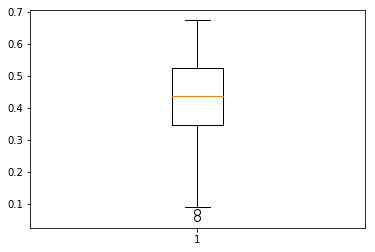

In [54]:
plt.boxplot(all_scores)
print np.min(all_scores), np.max(all_scores), np.median(all_scores)

In [9]:
ridge_params = {'alpha': [1,10,100,250,500,1000],
                'fit_intercept' : [True], 'normalize' : [False]}
ridge_mdl = GridSearchCV(Ridge(), param_grid = ridge_params, 
                                 scoring = 'neg_mean_squared_error', 
                                 cv = 3, n_jobs = -1)                                       
ridge_pred_prm = {}
for key in ClfResults_ridge.keys():
    module_to_proj = []
    y_pred = np.zeros(np.shape(ClfResults_ridge[key]['y_actual']))
    Code_scale = StandardScaler().fit_transform(Code) 
    y_meas_scale = StandardScaler().fit_transform(ClfResults_ridge[key]['y_actual'])
    ridge_pred_prm[key] = []
    for prm_num in range(25):
        y_meas_prm = np.random.permutation(y_meas_scale)
        for train, test in MesoPred.params['validation'].split(Code, y_meas_prm):
            ridge_mdl.fit(Code_scale[train], y_meas_prm[train])
            y_pred[test] = ridge_mdl.predict(Code_scale[test]) 
        ridge_pred_prm[key].append(metrics.r2_score(y_meas_prm, y_pred, multioutput = 'raw_values'))
    ridge_pred_prm[key] = np.median(ridge_pred_prm[key], axis = 0)  
all_scores_prm = np.asarray([tracer for key in ridge_pred_prm.keys()\
                                       for tracer in ridge_pred_prm[key]])   
   
clear_output()
            

In [16]:
#pk.dump(all_scores_prm, open('paper1_figures/module_perm_analysis.pkl','wb'))
all_scores_prm = pk.load(open('paper1_figures/module_perm_analysis.pkl','rb'))

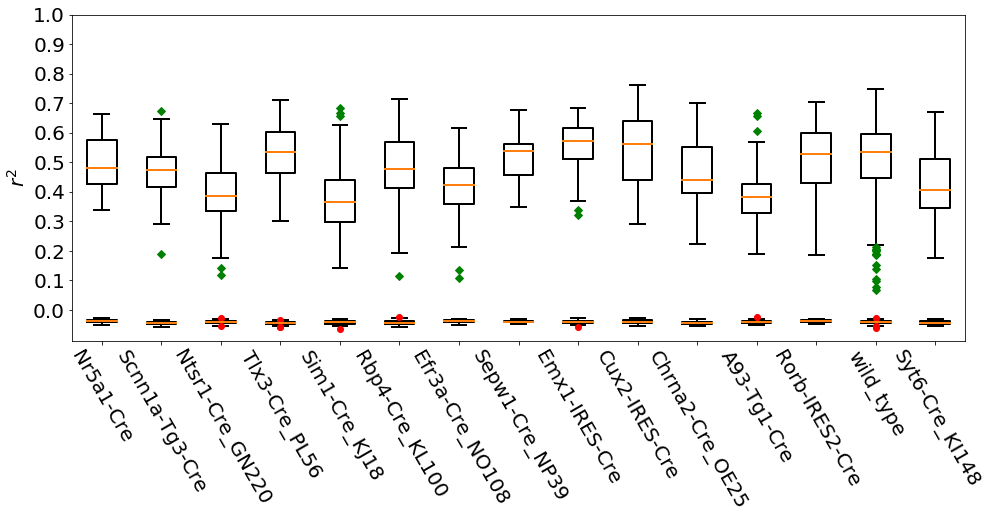

In [14]:
#all_scores_prm = np.asarray([tracer for key in ridge_pred_prm.keys()\
#                                       for tracer in ridge_pred_prm[key]])  

plt.figure(figsize = (16,6))
box1 = plt.boxplot([ridge_pred['Cux2-IRES-Cre'],ridge_pred['Emx1-IRES-Cre'],ridge_pred['wild_type']], 0, 'gD')
box2 = plt.boxplot([ridge_pred_prm['Cux2-IRES-Cre'],ridge_pred_prm['Emx1-IRES-Cre'],ridge_pred_prm['wild_type']], 0, 'r')
#box1 = plt.boxplot([ridge_pred[key] for key in ridge_pred.keys()], 0, 'gD')
#box2 = plt.boxplot([ridge_pred_prm[key] for key in ridge_pred.keys()], 0, 'r')   
for key in box1.keys():
        for bp1,bp2 in zip(box1[key],box2[key]):
            bp1.set(linewidth = 2)
            bp2.set(linewidth = 2)
plt.xticks([1,2,3],['Cux2-IRES-Cre','Emx1-IRES-Cre','wild_type'])
#plt.xticks([idx+1 for idx in range(len(ridge_pred.keys()))],[key for key in ridge_pred.keys()], rotation = 300)
plt.yticks(np.arange(0.0,1.1,0.1))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.ylabel(r'$r^2$', fontsize = 20)
plt.savefig('paper1_figures/for_paul_20_6_19/permutation_for_modules.jpg')
plt.show()

### End of experimental module analysis

### Experimental module analysis 16-06-2019

In [27]:
sample_num = 1000
srt_total_performance = pk.load(open('r2_srt_total_performance.pkl','rb'))
total_cre_r2 = [tmp[1] for tmp in srt_total_performance if tmp[0] != 'wild_type']
sample_size_sets = [len(ClfResults_ridge[key]['y_actual'][0]) for key in ClfResults_ridge.keys() if key != 'wild_type']
cre_median = np.median(total_cre_r2); cre_iqr = sci.stats.iqr(total_cre_r2)
wt_size = np.shape(ClfResults_ridge['wild_type']['y_actual'])[1]

cnt1 = 0; cnt2 = 0; med_dev = []; iqr_dev = []
#for sample_set in sample_size_sets:
for key in ClfResults_ridge.keys(): 
    if key == 'wild_type': continue
    sample_set = np.shape(ClfResults_ridge[key]['y_actual'])[1]
    for sample_run in range(sample_num):
        wt_subset = np.random.choice(wt_size, sample_set)
        A = ClfResults_ridge['wild_type']['y_actual'][:,wt_subset]
        B = ClfResults_ridge['wild_type']['y_preds'][:,wt_subset]
        wt_r2_sub = metrics.r2_score(A,B)
        #if np.max(wt_r2_sub) > np.max(total_cre_r2) or np.min(wt_r2_sub) < np.min(total_cre_r2):
        #if wt_r2_sub > np.max(total_cre_r2) or wt_r2_sub < np.min(total_cre_r2): 
        #print wt_r2_sub, cre_median + 1*cre_iqr, cre_median - 1*cre_iqr
        if wt_r2_sub > cre_median + 1*cre_iqr or wt_r2_sub < cre_median - 1*cre_iqr:  
            cnt1 += 1
            
print cnt1/(1.0*len(sample_size_sets)*sample_num), len(sample_size_sets)*sample_num

0.00435714285714 14000


#### Verdict: bullshit results, no statistical significance whatever - > End of experimental section

In [9]:
ridge_params = {'alpha': [1,10,100,250,500,1000],
                'fit_intercept' : [True], 'normalize' : [False]}
                                       
ridge_pred = {}
for key in ClfResults_ridge.keys():
    module_to_proj = []
    y_pred = np.zeros(np.shape(ClfResults_ridge[key]['y_actual']))
    Code_scale = StandardScaler().fit_transform(Code) 
    y_meas_scale = StandardScaler().fit_transform(ClfResults_ridge[key]['y_actual'])
    for train, test in MesoPred.params['validation'].split(Code,ClfResults_ridge[key]['y_actual']):
        ridge_mdl = GridSearchCV(Ridge(), param_grid = ridge_params, 
                             scoring = 'neg_mean_squared_error', 
                             cv = 3, n_jobs = -1)
        ridge_mdl.fit(Code_scale[train], y_meas_scale[train])
        y_pred[test] = ridge_mdl.predict(Code_scale[test]) 
    ridge_pred[key] = metrics.r2_score(y_meas_scale, y_pred, multioutput = 'raw_values')
all_scores = np.asarray([tracer for key in ridge_pred.keys()\
                                       for tracer in ridge_pred[key]])   
   
clear_output()
            

In [ ]:
Store_now = pk.load(open('saves/Multple_module_predictions.pkl','rb'))
Store_now['scores'].insert(5, all_scores)
Store_now['scores'].pop(6)
Store_now['scores'].pop(6)
print len(Store_now['scores'])

[0.28098187973812017, 0.37553419457683057, 0.43678936308627758, 0.47405914233651525, 0.49871757810402528, 0.50691708066394203, 0.49283898848066676, 0.48959792893428955, 0.39274776743984663, 0.22773533574338922]
['10', '25', '50', '100', '150', '200', '300', '400', '500', '1000']


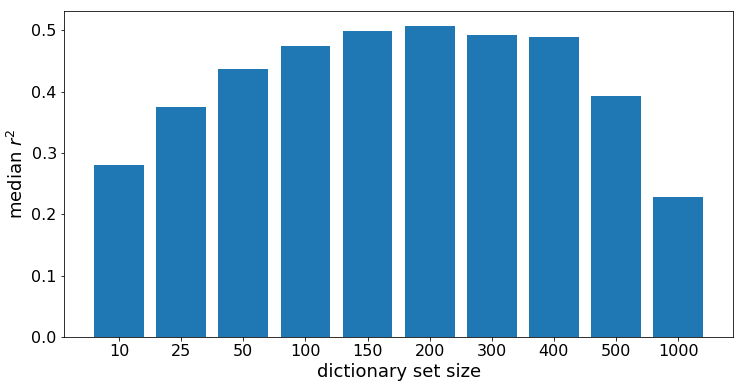

In [39]:
#Comp_set = [10,25,50,100,150,200,250,300,400,500,1000]
#scores   = [np.median(val) for val in Store_now['scores']]
#coef_num = [str(val) for val in Comp_set]
#coef_num.pop(6)
#pk.dump([scores,coef_num],open('paper1_figures/dictionary_to_performance.pkl','wb'))

[scores,coef_num] = pk.load(open('paper1_figures/dictionary_to_performance.pkl','rb'))
plt.figure(figsize = (12,6))
plt.bar(coef_num, scores)
ax = plt.gca(); ax.xaxis.set_tick_params(labelsize = 16); ax.yaxis.set_tick_params(labelsize = 16)
plt.ylabel(r'median $r^2$',fontsize = 18)
plt.xlabel('dictionary set size', fontsize = 18)
plt.savefig('paper1_figures/dictionary_to_performance.jpg')
plt.savefig('paper1_figures/dictionary_to_performance.eps')
print scores
print coef_num

In [ ]:
print sci.stats.iqr(all_scores), sci.stats.iqr(gene_scores), np.max(all_scores)

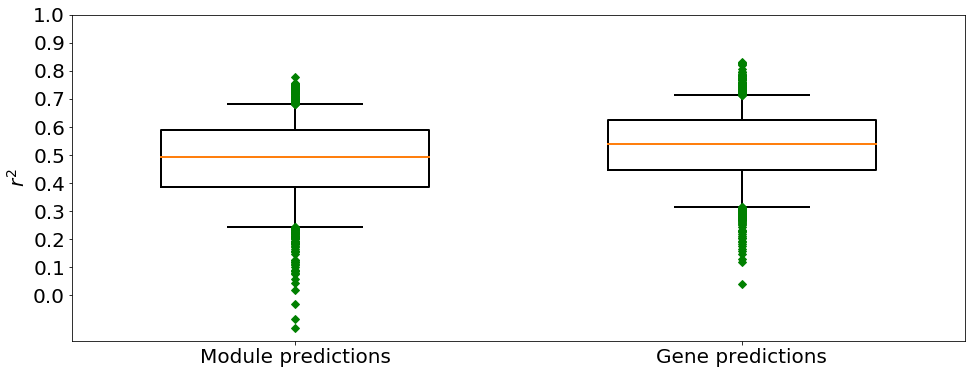

In [15]:
fig = plt.figure(figsize = (16,6))
ax = plt.gca()
#plt.tight_layout()
#plt.rcParams['figure.figsize']
plt.rcParams['axes.facecolor'] = 'white'
box = plt.boxplot([all_scores,gene_scores], 0, 'gD', widths = 0.6, whis = [5,95])
for key in box.keys():
        for bp in box[key]:
            bp.set(linewidth = 2)
plt.yticks(np.arange(0.0,1.1,0.1))
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.xticks([1,2],['Module predictions','Gene predictions'])
plt.ylabel(r'$r^2$', fontsize = 20)
plt.savefig('paper1_figures/module_to_gene_pred.jpg')
plt.savefig('paper1_figures/module_to_gene_pred.eps')
plt.show()

In [ ]:
#med_unc_scores = [val for key in ridge_pred.keys() for val in ridge_pred[key]]
#med_cons_scores = [val for key in ridge_pred_constr.keys() for val in ridge_pred_constr[key]]
#pk.dump([med_unc_scores,med_cons_scores], open('paper1_figures/Comparison_of_modules.pkl','wb'))

[med_unc_scores,med_cons_scores] = pk.load(open('paper1_figures/Comparison_of_modules.pkl','rb'))
plt.figure(figsize = (16,6))
plt.hist(med_unc_scores)
plt.hist(med_cons_scores)
ax = plt.gca()
ax.yaxis.set_tick_params(labelsize = 16)
ax.xaxis.set_tick_params(labelsize = 16)
plt.xlabel(r'$r^2$ score', fontsize = 20)
plt.ylabel('module frequency', fontsize = 20)
plt.legend(['uncostrained', 'constrained'],prop={'size': 20})
plt.savefig('paper1_figures/Comparison_of_modules.jpg')
plt.savefig('paper1_figures/Comparison_of_modules.eps')

In [ ]:
sel_tracer = np.argmax(ridge_pred)
pipeline            = Pipeline([('scaler', scaler), ('stability_selection', stability_selection)])
pipeline.fit(Code, ClfResults_ridge[key]['y_actual'][:,sel_tracer])
tmp = pipeline.get_params()['stability_selection'].get_support()
mods_again = [i for i, x in enumerate(tmp) if x]
stability_scores = pipeline.get_params()['stability_selection'].scores_
module_blacklist = np.argsort(stability_scores)[::-1][0:19]
pk.dump(module_blacklist, open('paper1_figures/module_blacklist.pkl','wb'))
clear_output()

In [ ]:
MesoPred.PlotStatistics(ClfResults_ridge, structure_summary = True,
                        laminar_summary = False, tracer_category = 'wild_type',
                        selected_tracer = 46)
MesoPred.PlotStatistics(Code, structure_summary = True,
                        laminar_summary = False, tracer_category = 'gene module',
                        selected_tracer = 118)
MesoPred.PlotStatistics(Code, structure_summary = True,
                        laminar_summary = False, tracer_category = 'gene module',
                        selected_tracer = 46)
MesoPred.PlotStatistics(Code, structure_summary = True,
                        laminar_summary = False, tracer_category = 'gene module',
                        selected_tracer = 117)

In [ ]:
sel_tracer = [idx for idx,val in enumerate(MesoPred.ConDict['wild_type']['structure-abbrev']) if val == 'PAA'][0]
#BP_25 = PL.BrainPlotter(resolution = 25)
BP_10 = PL.BrainPlotter(resolution = 10)
#BP_25.fit(projection = ClfResults_ridge['wild_type']['y_actual'][:,sel_tracer], 
#          chosen_indices = MesoPred.params['remaining_indices'])
BP_10.fit(projection = ClfResults_ridge['wild_type']['y_actual'][:,sel_tracer], 
          chosen_indices = MesoPred.params['remaining_indices'])
#pk.dump([BP_25, BP_10], open('paper1_figures/paa_volume.pkl','wb')) 

#[BP_25, BP_10] = pk.load(open('paper1_figures/paa_volume.pkl','rb'))
#BP_25.plot_slice(savefile = 'paper1_figures/brain_slice_wild_type_{}.jpg'.format(sel_tracer))
BP_10.plot_flatmap(savefile = 'paper1_figures/flatmap_wild_type_{}.jpg'.format(sel_tracer))

0.397684480622 46


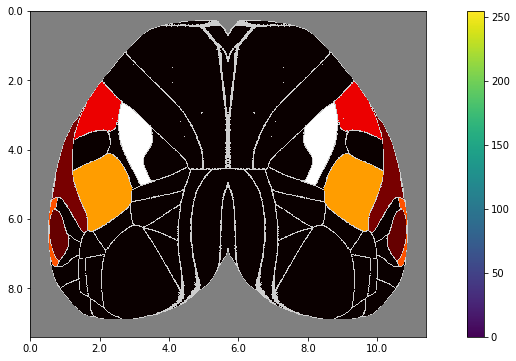

ZeroDivisionError: integer division or modulo by zero

In [50]:
sel_tracer = [idx for idx,val in enumerate(MesoPred.ConDict['wild_type']['structure-abbrev']) if val == 'PAA'][0]
for modulo in [46,117,118]:
    rho,pval = sci.stats.pearsonr(Code[:,modulo],ClfResults_ridge['wild_type']['y_actual'][:,sel_tracer])
    print rho, modulo
    #BP_25 = PL.BrainPlotter(resolution = 25)
    BP_10 = PL.BrainPlotter(resolution = 10)
    #BP_25.fit(projection = Code[:,modulo], chosen_indices = MesoPred.params['remaining_indices'])
    BP_10.fit(projection = Code[:,modulo], chosen_indices = MesoPred.params['remaining_indices'])
    #BP_25.plot_slice()
    BP_10.plot_flatmap()

In [ ]:
G_Code = pk.load(open('saves/Grange_Code.pkl','rb'))
sel_tracer = [idx for idx,val in enumerate(MesoPred.ConDict['wild_type']['structure-abbrev']) if val == 'PAA'][0]
for code in range(len(G_Code[0])):
    rho = sci.stats.pearsonr(ClfResults_ridge['wild_type']['y_actual'][:,sel_tracer], G_Code[:,code])[0]
    if rho > 0.2:
        print code
        BP_25 = PL.BrainPlotter(resolution = 25)
        BP_10 = PL.BrainPlotter(resolution = 10)
        BP_25.fit(projection = G_Code[:,code], chosen_indices = MesoPred.params['remaining_indices'])
        BP_10.fit(projection = G_Code[:,code], chosen_indices = MesoPred.params['remaining_indices'])
        BP_25.plot_slice(savefile = 'paper1_figures/grange_brain_slice_module_{}.jpg'.format(code))
        BP_10.plot_flatmap(savefile = 'paper1_figures/grange_flatmap_module_{}.jpg'.format(code))
 

### Experimentation: Apply the Oh et al model to our data

In [ ]:
MesoPred.GetLayerResolvedArray(creFilter = ['Cux2-IRES-Cre'])